<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/newDataSet/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-19 11:52:24            263        404  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           9061        163  1.0              
zeesolver/data-eng-salary-2024                                       Data Developer Salary in 2024💰                   108KB  2024-06-10 07:33:22           1353         25  1.0              
akashnath29/lung-cancer-dataset                   

In [7]:
! kaggle datasets download 'msambare/fer2013'

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
100% 60.3M/60.3M [00:03<00:00, 23.5MB/s]
100% 60.3M/60.3M [00:03<00:00, 16.7MB/s]


In [8]:
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [9]:
# import tensorflow as tf
# import cv2
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [10]:
# img_array = cv2.imread("test/angry/PrivateTest_10131363.jpg")

In [11]:
# img_array.shape

In [12]:
# plt.imshow(img_array)

In [13]:
# Datadirectory = 'train/'

In [14]:
# Classes =['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

In [15]:
# for category in Classes:
#   path = os.path.join(Datadirectory, category)
#   for img in os.listdir(path):
#     img_array = cv2.imread(os.path.join(path,img))
#     plt.imshow(img_array)
#     plt.show()
#     break
#   break

In [16]:
# img_size = 224
# new_array = cv2.resize(img_array, (img_size, img_size))
# plt.imshow(new_array)
# plt.show()

In [17]:
# new_array.shape

In [18]:
# training_Data = []

# def create_training_Data():
#   for category in Classes:
#     path = os.path.join(Datadirectory, category)
#     class_num = Classes.index(category)
#     for img in os.listdir(path):
#       try:
#         img_array = cv2.imread(os.path.join(path,img))
#         new_array = cv2.resize(img_array, (img_size, img_size))
#         training_Data.append([new_array, class_num])
#       except Exception as e:
#         pass

In [19]:
# create_training_Data()

In [20]:
# print(len(training_Data))

In [21]:
# import random
# random.shuffle(training_Data)

In [22]:
# X = []
# y = []

# for features, label in training_Data:
#   X.append(features)
#   y.append(label)

# X = np.array(X).reshape(-1, img_size, img_size, 3)

In [23]:
# X.shape

In [24]:
# X = X/255.0;

In [25]:
# type(y)

In [26]:
# Y = np.array(y)

In [27]:
# Y.shape

In [28]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [29]:
# model = tf.keras.applications.MobileNetV2() # Pre-trained Model

In [30]:
# model.summary()

In [31]:
# base_input = model.layers[0].input

In [32]:
# base_output = model.layers[-2].output

In [33]:
# base_output

In [34]:
# final_output = layers.Dense(128)(base_output)
# final_output = layers.Activation('relu')(final_output)
# final_output = layers.Dense(64)(final_output)
# final_output = layers.Activation('relu')(final_output)
# final_output = layers.Dense(7, activation='softmax')(final_output)

In [35]:
# final_output

In [36]:
# new_model = keras.Model(inputs=base_input, outputs=final_output)

In [37]:
# new_model.summary()

In [38]:
# new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# new_model.fit(X, y, epochs=25, validation_split=0.1)

In [40]:
# new_model.save('my_model_new.h5')

In [41]:
# new_model = tf.keras.models.load_model('my_model_new.h5')

In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [43]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [44]:
train_data_dir='train/'
validation_data_dir='test/'

In [45]:
train_datagen = ImageDataGenerator(
					rescale=1./255, #gray scale image
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [46]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [48]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


In [49]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [50]:
#make sure the generator is working and that image and lable are indeed lined up.
img, label = train_generator.__next__() #img : (32,48,48,1) lable: (32,7)

In [51]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten()) #to get one dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax')) #seven classes

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [52]:
train_path = "train/"
test_path = "test/"

In [53]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [54]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [55]:
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size, #897
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size) #224

model.save('emotion_detection_model_100epochs.keras')

Epoch 1/50
897/897 [==============================] - 41s 37ms/step - loss: 1.7700 - accuracy: 0.2670 - val_loss: 1.6582 - val_accuracy: 0.3348
Epoch 2/50
897/897 [==============================] - 29s 32ms/step - loss: 1.6595 - accuracy: 0.3396 - val_loss: 1.5068 - val_accuracy: 0.4106
Epoch 3/50
897/897 [==============================] - 31s 35ms/step - loss: 1.5423 - accuracy: 0.3969 - val_loss: 1.4006 - val_accuracy: 0.4542
Epoch 4/50
897/897 [==============================] - 31s 34ms/step - loss: 1.4590 - accuracy: 0.4350 - val_loss: 1.3171 - val_accuracy: 0.4943
Epoch 5/50
897/897 [==============================] - 30s 34ms/step - loss: 1.3936 - accuracy: 0.4639 - val_loss: 1.3033 - val_accuracy: 0.5061
Epoch 6/50
897/897 [==============================] - 29s 32ms/step - loss: 1.3524 - accuracy: 0.4798 - val_loss: 1.2212 - val_accuracy: 0.5328
Epoch 7/50
897/897 [==============================] - 29s 32ms/step - loss: 1.3169 - accuracy: 0.4949 - val_loss: 1.1961 - val_accuracy:

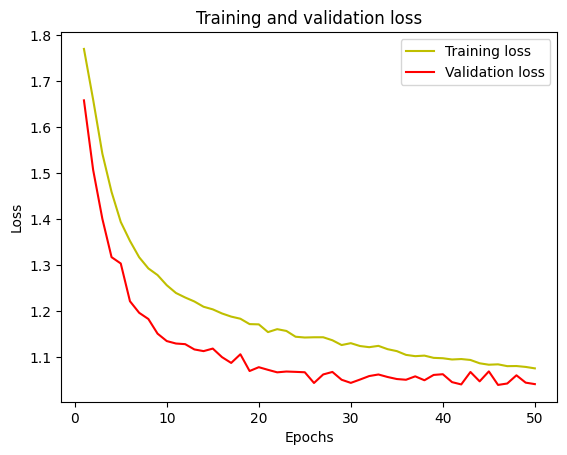

In [56]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

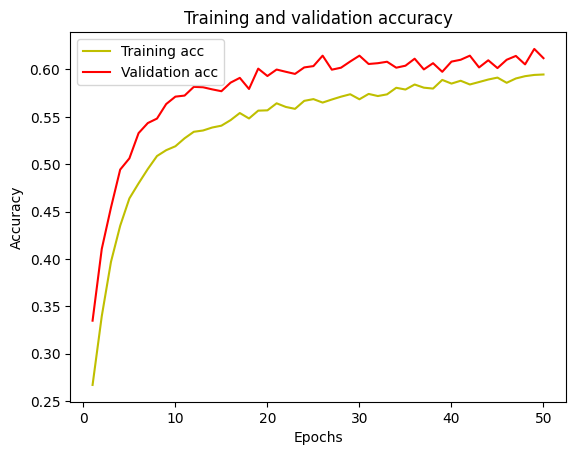

In [58]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
from keras.models import load_model

In [60]:
#Test the model
my_model = load_model('emotion_detection_model_100epochs.keras', compile=False)

In [61]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 109ms/step
Accuracy =  0.6875


In [62]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

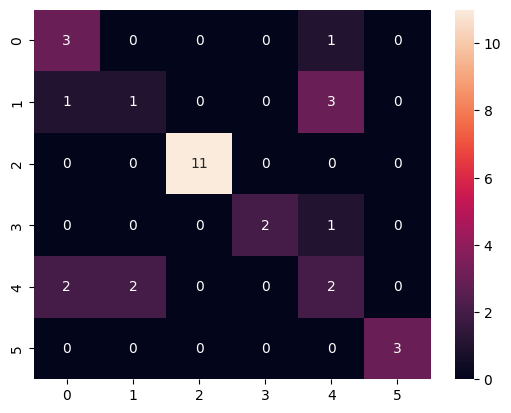

In [63]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

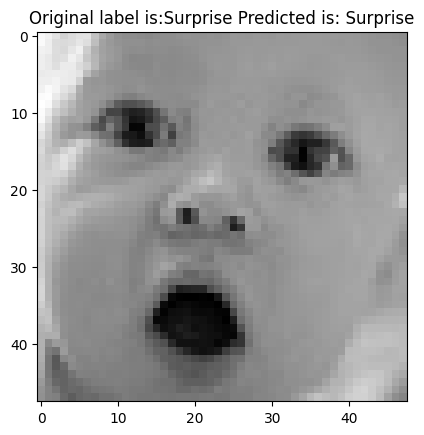

In [64]:
import random
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()